# 神经网络

## 从感知机到神经网络

神经网络和感知机有许多的共同点.

神经网络的结构：

![net](./pic/net.png)

分为三层，最左边为输入层，用于输入数据，中间为隐藏层，最右边为输出层。

## 激活函数

激活函数一般是非线性函数。

感知机采用的是阶跃函数

In [2]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

print(step_function(np.array([-1.0, 1.0, 2.0])))

[0 1 1]


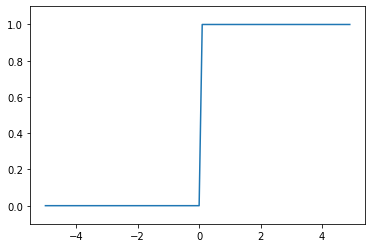

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

sigmoid函数是神经网络经常使用的一个激活函数：

$$
h(x) = \frac{1}{1 + e^{-x}}
$$



In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


print(sigmoid(np.array([-1.0, 1.0, 2.0])))

[0.26894142 0.73105858 0.88079708]


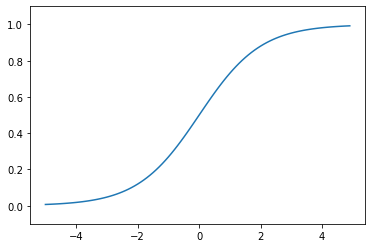

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

对比之下，sigmoid函数是一条平滑的曲线，sigmoid函数的平滑性对于神经网络的学习具有重要的意义。另外一点，sigmoid的值可以取0到1之间的任何数值，而阶跃函数只能取0和1，所以感知机中流动的是0和1的二元信号，而神经网络中流动的是实数值信号。

阶跃函数与sigmoid函数都是非线性函数，神经网络的激活函数必须采用非线性函数，线性函数的问题在于无论多少层的网络，总存在与之等效的无隐藏层的网络。因此为了发挥叠加层所带来的优势就必须采用非线性函数。

另外一个常用的激活函数就是ReLU函数：

$$
h(x)=\left\{\begin{array}{ll}
x & (x>0) \\
0 & (x \leqslant 0)
\end{array}\right.
$$

In [6]:
def relu(x):
    return np.maximum(0, x)

## 3层神经网络的实现

三层神经网络的结构：

![net](./pic/3-net.png)

In [7]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def identity_function(x):
    return x

def forward(net, x):
    W1, W2, W3 = net['W1'], net['W2'], net['W3']
    b1, b2, b3 = net['b1'], net['b2'], net['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

net = init_network()
x = np.array([1.0, 0.5])
y = forward(net, x)
print(y)

[0.31682708 0.69627909]


上面的网络最后输出层是恒等函数，对于输出不进行任何改动，但一般会进行处理，利用softmax函数：

$$
y_k = \frac{e^{a_k}}{\sum_{i=1}^{n}e^{a_i}}
$$

In [9]:
def softmax(a):
    # C 是为了解决溢出问题
    C = np.max(a)
    exp_a = np.exp(a - C)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

在分类问题中输出层的神经元的数目设置为要分类的类别数；

输出数据的集合称为批，通过以批为单位进行推理处理，可以加速运算。